<a href="https://colab.research.google.com/github/sm0602/MLnow_GirlScript/blob/main/UnivariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/LiveCodeSession/02_EDA/student'

/content/drive/MyDrive/LiveCodeSession/02_EDA/student


In [ ]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
mathData = pd.read_csv('student-mat.csv', sep=';')

In [ ]:
mathData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


We are just going to consider the columns `G1` and `G3`  for univariate linear regression

In [ ]:
uniMathData = mathData[['G1','G3']]
uniMathData.head()

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [ ]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [ ]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


#Data Visualization

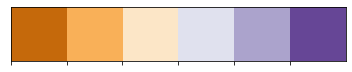

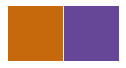

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
uniMathData.columns

Index(['G1', 'G3'], dtype='object')

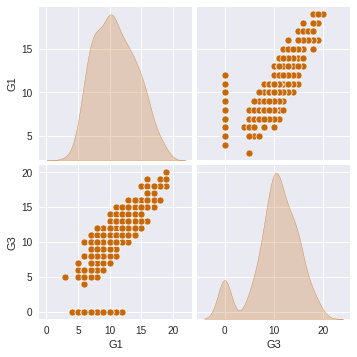

In [ ]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars = ['G1', 'G3'],
             diag_kind = 'kde')

#Data Splits

In [ ]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0)
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [ ]:
# copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [ ]:
# removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [ ]:
# univariate -> num(features) = 1
# multivariate -> num(features) > 1 = 11

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [ ]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 19ms/step - loss: 12.3138 - mae: 12.3138 - mse: 177.2415 - val_loss: 12.9332 - val_mae: 12.9332 - val_mse: 193.4912
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 12.1968 - mae: 12.1968 - mse: 174.1331 - val_loss: 12.8083 - val_mae: 12.8083 - val_mse: 189.9650
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 12.0793 - mae: 12.0793 - mse: 171.0200 - val_loss: 12.6836 - val_mae: 12.6836 - val_mse: 186.4795
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 11.9619 - mae: 11.9619 - mse: 167.9436 - val_loss: 12.5590 - val_mae: 12.5590 - val_mse: 183.0278
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 11.8438 - mae: 11.8438 - mse: 164.8409 - val_loss: 12.4349 - val_mae: 12.4349 - val_mse: 179.6252
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 11.7270 - mae: 11.7270 - mse: 161.8219 - val_loss: 12.3102 - val_mae: 1

In [ ]:
print(history)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


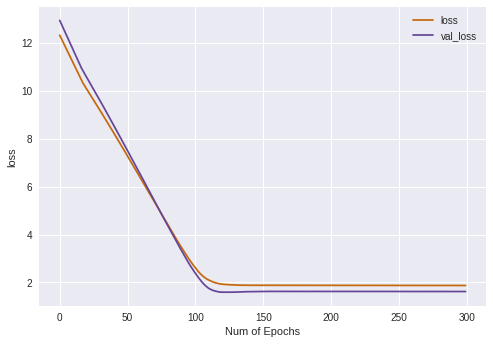

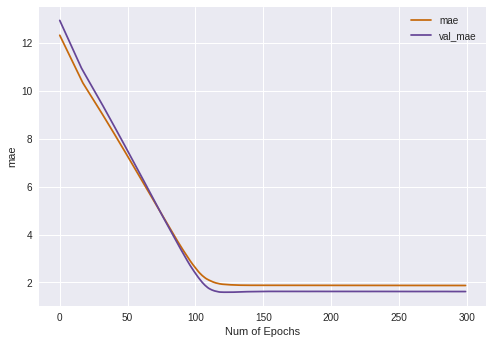

In [ ]:
# string --> loss , mae, mse

def plotGraphs(history, string): 
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Num of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

plotGraphs(history, 'loss')
plotGraphs(history, 'mae')

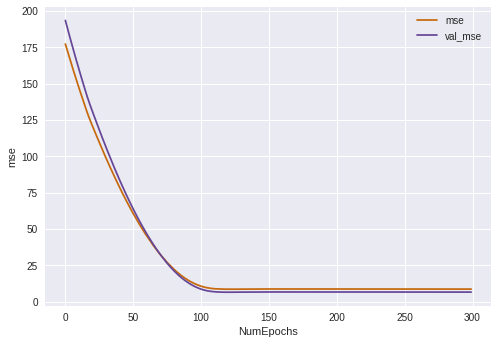

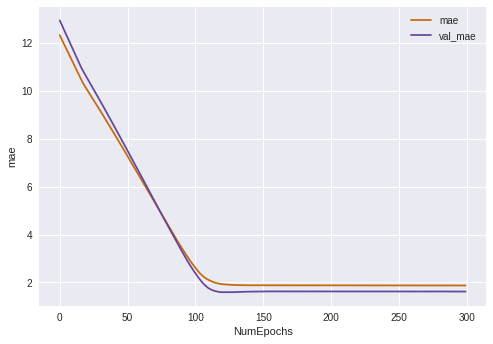

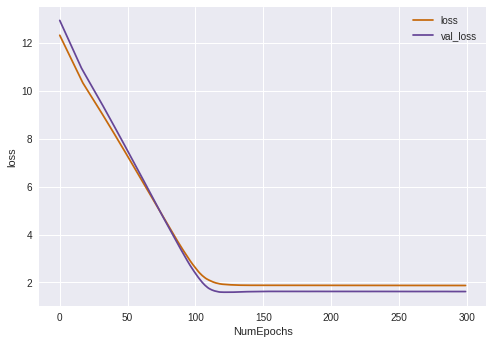

In [ ]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [ ]:
model.predict([1])

array([[1.819124]], dtype=float32)

In [ ]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#prediction for single value

print(f'Prediction for input value 1: {model.predict([1])}')

# for a list of values
tempListOfPreds = [1,2,3,4,5]
print(f'''

input List = {tempListOfPreds}

List of predictions:
{model.predict(tempListOfPreds)}

List of predictions (flattened out):
{model.predict(tempListOfPreds).flatten()}
'''
)

Prediction for input value 1: [[1.819124]]


input List = [1, 2, 3, 4, 5]

List of predictions:
[[1.819124 ]
 [2.7443693]
 [3.6696146]
 [4.59486  ]
 [5.5201054]]

List of predictions (flattened out):
[1.819124  2.7443693 3.6696146 4.59486   5.5201054]



In [ ]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [ ]:
testPreds = model.predict(testFeatures).flatten()

In [ ]:
print(len(testPreds))
print(testPreds)

79
[13.847313   6.4453506 11.071577  16.623049  16.623049  11.996822
 13.847313  18.47354   18.47354    8.295841  13.847313  12.922068
  8.295841   7.370596   9.2210865 12.922068  11.071577  15.6978035
  7.370596  10.146332  14.772558  12.922068  13.847313  15.6978035
  7.370596   7.370596   8.295841  10.146332  11.996822  10.146332
 11.996822  12.922068  10.146332   6.4453506  9.2210865 11.996822
  7.370596   8.295841  13.847313   9.2210865  9.2210865  7.370596
 11.996822   6.4453506 12.922068   7.370596   7.370596  11.071577
 12.922068  16.623049  11.996822  14.772558   9.2210865 11.996822
 14.772558  11.996822  14.772558  11.996822  14.772558  11.071577
 11.996822   8.295841  15.6978035  7.370596  15.6978035 11.071577
 15.6978035 12.922068   8.295841   8.295841  11.996822  17.548294
 12.922068  15.6978035 10.146332   7.370596  10.146332   7.370596
 11.071577 ]


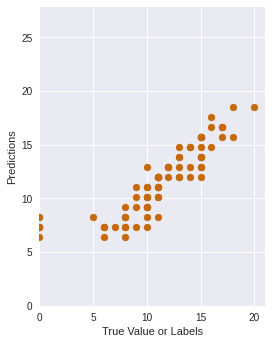

In [ ]:
# prediction plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

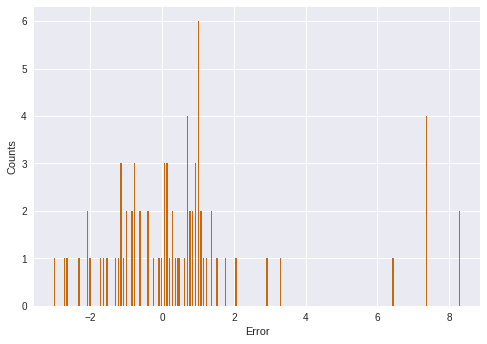

In [ ]:
# error plot --> gaussian distribution

def errorPlot(preds, labels, counts):
  errors = preds-labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)